# Lecture 10: Integration + Quadrature = Sums

After exploring a lot of basics concepts surrounding numbers, iteration, and programming, it's time to get into some applied numerical analysis.

The theme for the course will always remain the same: 

    Code: large amounts of abstraction + healthy mixtures of procedural, functional, and object-oriented 
    
    Math: iteration, recursion + linear operations on data. 
    
As we go forward, it might feel like things are getting complicated at times. But this is not the case. 

<h3><center> Math is subtle, but it's not magical. </center></h3>
    
For example, maybe you've seen come "complicated" looking expressions such as 

$$
\large 
\int_{D} \nabla \cdot u\,  \mathrm{d} V \ = \ \int_{\partial D} u \cdot \, \mathrm{d}A 
, \quad \quad \quad \quad
\int_{A} (\nabla \times u) \, \cdot  \, \mathrm{d}A \ = \ \int_{\partial A} u \cdot \mathrm{d}\ell 
$$

Ie, Gauss' divergence theorem, and/or Stokes theorem? 

Maybe it's occurred to you that these look a lot like the **Fundamental Theorem of Calculus:**

$$\large  
\int_{a}^{b} f'(x)\, \mathrm{d} x \ = \ f(b) - f(a), \quad \quad \quad \frac{d}{dx} \int_{a}^{x} f(y) \, \mathrm{d} y \ = \ f(x)$$

***evaluting the limit of the integral+intergrating in term of x***



<h4><center> ***Gauss and Stokes theorem*** are the same thing as the Fundamental Theorem of Calculus, only with more dimensions. </center></h4>

All of these expressions relate the integral of a function in some dimension to the integral of it's derivative in one higher dimension.  

<br>

<br>

<br>

<br>

And I've got news for you: ***It gets simpler.***

<h1><center> Integrals are sums! </center></h1>



In fact the integral sign was originally designed to look like a fancy letter 

$${\Huge S} \quad \quad  {\Huge \longleftrightarrow} \quad \quad  \Large{ \boldsymbol{\int}}  $$ 

$${\Large Leibniz \ invented \ it:}$$

<img 

$${\Large FANCY!!!}$$

<br>

This is true if you are thinking about Riemann integration (sums), or you are fancy and prefer one of the luxury integration formulations; Lebesgue, Stieltjes or even some more exotic brands. 

No matter how you shake it. At the bottom level, all integration theorems are re-packaged versions of the following simple fact:

$$\large s_{n} - s_{0} \ = \ \sum_{k=1}^{n} a_{k}  \quad \quad  \longleftrightarrow \quad \quad  a_{n} \ = \ s_{n} - s_{n-1}  $$

And while were are at it, let's face the fact that these fancy sums are just high-priced versions of 

$$
\large
s_{1} - s_{0} = a_{2} ,\quad  s_{2} - s_{0} = a_{1} + a_{2} \quad  \quad \longleftrightarrow  \quad  \quad a_{1} \ = \ s_{2}-s_{1}, \quad a_{2} \ = \ s_{1}-s_{0}
$$

Getting from this to the Gauss divergence theorem just requires keeping track of about ten simple facts; difficult, but not complicated. 

<h2><center> All the fancy theorems you've ever seen are a clever reshuffling of arithmetic. </center></h2>



The fortunate thing, is that if you can reckon a problem out enough to know how to sum it, then you can get a computer to keep track of a huge amount of the information for you. 

**INTEGRATION BY PARTS**

You might also recall things like

$$
\large \int_{D} \phi \, \nabla \cdot u \, \mathrm{d} V \ = \  \int_{\partial D} \phi \, u \cdot \hat{n} \, \mathrm{d} A
-\int_{D}  u \cdot \nabla \phi \, \mathrm{d} V  
$$

Or

$$
\large 
\int_{a}^{b} f(x)\, g'(x) \, \mathrm{d}x \ = \ f(b)\,g(b) - f(a)\,g(a) - \int_{a}^{b} f'(x)\, g(x) \, \mathrm{d}x
$$

Guess what?

$$
\large 
\sum_{k=1}^{n} u_{k} \, (v_{k}-v_{k-1}) \ = \ u_{n+1}v_{n} -  u_{1}v_{0} -\sum_{k=1}^{n} (u_{k+1}-u_{k}) \, v_{k} 
$$

<h2><center> This is called "summation by parts", and its nothing mysterious</center></h2>

Even though it's based on simple reasoning, the integration by parts formula is one of the most useful tools in the mathematical case. We'll use it again, and again, and again. In fact we'll use it iteratively. 


<br>

## Trapezoidal rule

For a function, $\ f(x) \ $ defined on $ \ a\le x \le b  \ $, define the **linear interpolation** 


$$
\large
L(x) \ = \ f(b)\, \frac{x-a}{b-a} \ +\  f(a) \, \frac{b-x}{b-a}
$$

This has the property that

$$
\large
L(a) \ = \ f(a), \quad L(b) \ = \ f(b) , \quad L'(x) \ = \ \frac{f(b)-f(a)}{b-a}, \quad L''(x) \ = \ 0
$$

Also

$$
\large
\int_{a}^{b} L(x)\, \mathrm{d} x \ = \ \frac{b-a}{2}\, \left( \, f(b) \ + \  f(a)\, \right) 
$$
this is represnt area of something with base n hight 


### Example function 

Let's define a function to work with 

$$
\large
f(x) \ = \ \frac{x}{\sqrt{2}} + \frac{1}{5}\, \sin ( \, 9 \, x\, ), \quad \mathrm{for} \quad 0 \le x \le 1 
$$

It's simple to compute the integral of this exactly over any interval.

$$
\large \int f(x)\, \mathrm{d} x \ = \ \frac{x^2}{2 \sqrt{2}}-\frac{1}{45} \cos (9 x) \ + \ \textit{Constant}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x,integral=False):
    if integral:
        i = lambda x: x**2/(2*np.sqrt(2)) - np.cos(9*x)/45
        return i(x[-1]) - i(x[0])
    return np.sqrt(0.5)*x + 0.2*np.sin(9*x)

Make a **helper class** to plot more easily. You could do this more simply. But it's another change to use object-oriented ways to do things.

In [2]:
class show_plots:
    
    def __init__(self,linewidth=2.5,fontsize=20,titlesize=15,
                 xy=['$x$','$f(x)$'],title='',style='plot',figsize=None):
        
        
        self.linewidth = linewidth
        self.fontsize  = fontsize
        self.titlesize = titlesize
        self.xlabel    = xy[0]
        self.ylabel    = xy[1]
        self.title     = title
        
        self.fig, self.ax = plt.subplots(figsize=figsize)
        
        self.ax.set_xlabel(self.xlabel,fontsize=fontsize)
        self.ax.set_ylabel(self.ylabel,fontsize=fontsize)
        self.ax.set_title(self.title,fontsize=titlesize)
        self.ax.tick_params(axis='both',labelsize=fontsize)
        
        self.style = style
        
    def __call__(self,x,y,color=None):
        
        if self.style == 'plot':
            self.ax.plot(x,y,linewidth=self.linewidth,color=color)
            
        if self.style == 'log':
            self.ax.semilogy(x,y,linewidth=self.linewidth,color=color)
            
        if self.style == 'log-log':
            self.ax.loglog(x,y,linewidth=self.linewidth,color=color)
        
        
    def __getitem__(self,*args):
        
        
        self.ax.legend(list(args[0]),fontsize=self.titlesize)
    

Make a domain $0 \le x \le 1$. And a "grid" that is on the same domain but with a different number of points. 

In [3]:
x  = np.linspace(0,1,1000)

# A "grid" with the same end point as x, and fewer total points.
def g(n): return np.linspace(x[0],x[-1],n+1)

One segment:

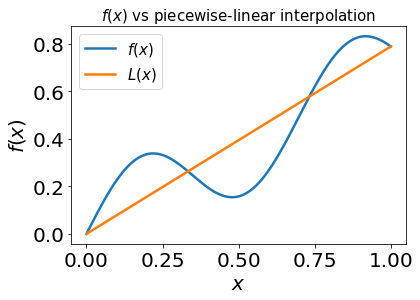

In [6]:
n = 1

show = show_plots(title='$f(x)$ vs piecewise-linear interpolation');

show(x,f(x))
show(g(n),f(g(n)))

show['$f(x)$','$L(x)$']

larger negative area of .4 of the blue line 

Two segments **+**

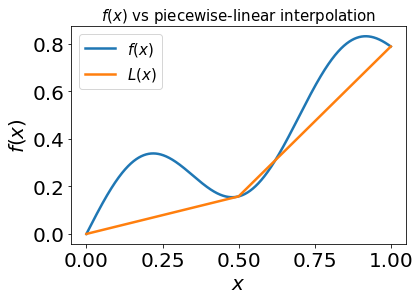

In [9]:
n = 2 # try 3 to 10 and check

show = show_plots(title='$f(x)$ vs piecewise-linear interpolation');

show(x,f(x))
show(g(n),f(g(n)))

show['$f(x)$','$L(x)$']

## Exact integral of piecewise linear approximation

For 

$$\large x_{i} \ = \ \frac{i}{n}\,(b-a)$$

<br>

$$ \large I \ \equiv \ \int_{a}^{b} f(x)\, \mathrm{d} x \ \approx \ \sum_{i=1}^{n} \int_{x_{i-1}}^{x_{i}} L_{i}(x) \, \mathrm{d} x \ = \ \sum_{i=1}^{n} \frac{x_{i}-x_{i-1}}{2}\, \left( \ \, f(x_{i}) + f(x_{i-1}) \ \right) $$

Where 

$$\large x_{i}-x_{i-1} = \frac{b-a}{n}.$$ 

Expanding things out

$$
I \ \approx \ \frac{1}{2n}\left(\  f(x_{1}) + f(x_{0}) \ \right) + \frac{1}{2n}\left(\  f(x_{2}) + f(x_{1}) \ \right) + \ldots + \frac{1}{2n}\left(\  f(x_{n-1}) + f(x_{n-2}) \ \right)+  \frac{1}{2n}\left(\  f(x_{n}) + f(x_{n-1}) \ \right)
$$

<br>

## The Trapezoidal (a.k.a. trapezium) rule. 

We can see that every point in the sum is counted twice, except the end points. Therefore 

$$
\Large
I \ \approx \ \frac{f(x_{0})\ + \ f(x_{n})}{2 n} \ + \ \frac{1}{n}\sum_{i=1}^{n-1} f(x_{i})  
$$

Let's code it up and see how it behaves:

In [10]:
def trap(f,x):
    """This function takes a function to evaluate on a set of points and does the trapezoidal rule sum.
    
    Parameters
    ----------
    f: function object
    x: 1D np.array
    
    """
    a, b, mid = x[0], x[-1], x[1:-1]
    
    h = (b-a)/(len(x)-1)
  
    return h*(0.5*( f(a) + f(b) )  + np.sum(f(mid)) )  

The same thing fits on one line. Even thought it's not as clear what's going on.

In [11]:
def trap(f,x): return ((x[-1]-x[0])/(len(x)-1))*(0.5*( f(x[0]) + f(x[-1]) )  + np.sum(f(x[1:-1])) )  

Here is a helper function that compares two numbers 

In [12]:
def error(A,B,report=True,n=''):
    e = abs(A-B)/abs(B)
    if report : print('{:>2s}  {:>6.3f}   {:>5.3f}  {:>15.4e}'.format(str(n),A,B,e))
    return e

In [13]:
nmin, nmax = 1, 30

S = f(x,integral=True)

print("'exact' integral value: ",S)
print('')

print(' n    Trap   Exact  |Trap-Exact|/|Exact| ')
print('--   ------  -----  ---------------------')
for n in range(nmin,nmax):
    T=trap(f,g(n))
    error(T,S,n=n)

'exact' integral value:  0.39602295196848875

 n    Trap   Exact  |Trap-Exact|/|Exact| 
--   ------  -----  ---------------------
 1   0.395   0.396       3.1759e-03
 2   0.276   0.396       3.0204e-01
 3   0.358   0.396       9.5833e-02
 4   0.376   0.396       4.9586e-02
 5   0.384   0.396       3.0650e-02
 6   0.388   0.396       2.0904e-02
 7   0.390   0.396       1.5197e-02
 8   0.391   0.396       1.1556e-02
 9   0.392   0.396       9.0893e-03
10   0.393   0.396       7.3384e-03
11   0.394   0.396       6.0502e-03
12   0.394   0.396       5.0746e-03
13   0.394   0.396       4.3179e-03
14   0.395   0.396       3.7189e-03
15   0.395   0.396       3.2367e-03
16   0.395   0.396       2.8426e-03
17   0.395   0.396       2.5165e-03
18   0.395   0.396       2.2435e-03
19   0.395   0.396       2.0127e-03
20   0.395   0.396       1.8158e-03
21   0.395   0.396       1.6465e-03
22   0.395   0.396       1.4998e-03
23   0.395   0.396       1.3719e-03
24   0.396   0.396       1.2597e-03
25   0

Let's run it for longer and make a plot of the error

In [14]:
S = f(x,integral=True)

nmin, nmax = 10, 10000
e = np.zeros(nmax-nmin+1)
n = np.arange(nmin,nmax+1)

for i in range(len(n)):
    T=trap(f,g(n[i]))
    e[i] = error(T,S,report=False)   

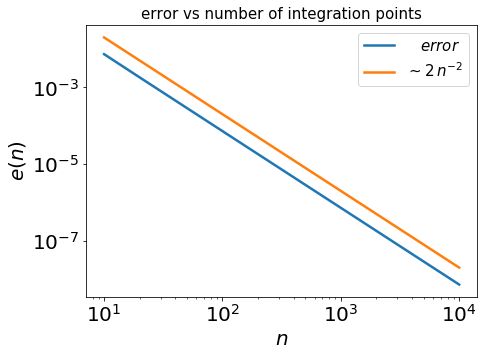

In [15]:
show = show_plots(style='log-log',figsize=(7,5),xy=['$n$','$e(n)$'],
                  title='error vs number of integration points');

show(n,e)
show(n,2/n**2)
show['   $error$', '$\sim  2\,n^{-2}$']

We how to see the error decreases as some power of $n$; i.e., 

$$\large e \ \sim \ C_{0} \, n^{- p} $$

The exponent, $p$, is called the ***order*** of convergence. 

A `log-log` plot is a great way to determine the order of convergence. This is because

$$
\large
\log e \ = \ - p \, \log n + \log C_{0} 
$$

***Power laws become linear on a `log-log` scale.*** The slope of the line gives the exponent, the offset gives $C_{0}$. 


## Compensated plots

We plotted $2 n^{-2}$ versus the error. This was because we wanted something simple to show the slope, and to keep it out of the way of the actual plot. But we can see that the plots are shifted with respect to each other. How can we find the constant pre-factor?

We can make a ***compensated*** plot. This means that we have some error. $e(n)$. And we have a theory that 

$$\large e(n) \ \approx \ C_{0}\, n^{-2}$$.

But we don't know $C_{0}$. Therefore, we can plot 

$$\large \widehat{e}\,(n) \ = \  e(n) \times n^{2} \ \approx \ C_{0}.$$

This should be close to constant if our suspicions are correct.


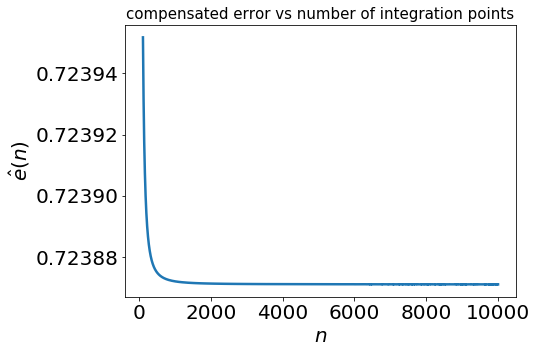

In [16]:
show = show_plots(figsize=(7,5),xy=['$n$','$\hat{e}(n)$'],
                  title='compensated error vs number of integration points');

i = 100
show(n[i:],e[i:]*n[i:]**2)

We can see that the behaviour is very well described as 

$$\large  e(n) \  \approx  \ 0.72387 \, n^{-2}$$

The trapezoidal rule typically shows ***quadratic convergence***.

To make sure, it's good to see if the result is *inconsistent* with other power laws:

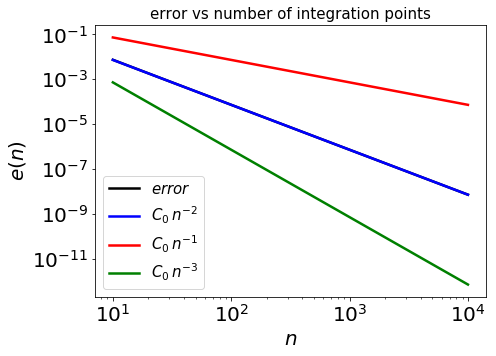

In [17]:
show = show_plots(style='log-log',figsize=(7,5),xy=['$n$','$e(n)$'],
                  title='error vs number of integration points');

Coeff  = 0.72387
colors = ['blue','green','red']

show(n,e,color='black')
show(n,Coeff/n**2,color='blue')
show(n,Coeff/n**1,color='red')
show(n,Coeff/n**3,color='green')
    
show['$error$', '$C_{0}\, n^{-2}$','$C_{0}\, n^{-1}$','$C_{0}\, n^{-3}$']

<h2><center> The error is right under the -2 slope line. The other lines are very different. </center></h2>

We can't see the black line because it's completely under the blue line.

#### What about the end points?

We can see that those fussy factors of $1/2$ for the end values are important. The sum still converges, but at a much--reduced rate

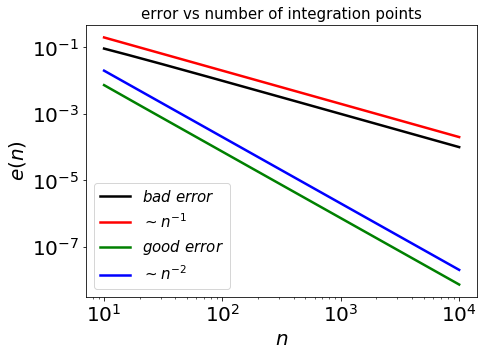

In [18]:
def bad_trap(f,x):
    # Don't fix up the end points.
    
    a, b = x[0], x[-1] 
    
    h = (b-a)/(len(x)-1)
  
    return h*np.sum(f(x))  

nmin, nmax = 10, 10000
bad_e = np.zeros(nmax-nmin+1)
n = np.arange(nmin,nmax+1)

for i in range(len(n)):
    T=bad_trap(f,g(n[i]))
    bad_e[i] = error(T,S,report=False)   

    
show = show_plots(style='log-log',figsize=(7,5),xy=['$n$','$e(n)$'],
                  title='error vs number of integration points');

Coeff  = 0.72387

show(n,bad_e,color='black')
show(n,2/n**1,color='red')

show(n,e,color='green')
show(n,2/n**2,color='blue')

show['$bad\ error$','$\sim n^{-1}$', '$good\ error$', '$\sim n^{-2}$']

<h3><center> Make sure to keep track of the end values! Otherwise you will have a lot more error. </center></h3>

## A different function 

Let's try it with another function:

$$
\large p(x) \ = \ \frac{1}{2}  +  \frac{3}{8\, \cos (2\, \pi\,  x\,)\ +\ 10}
$$

In this case, 

$$
\large \int_{0}^{1} p(x) \, \mathrm{d} x \ = \ 1
$$


Here's what it looks like:

In [19]:
def p(x): return 0.5 + 3/(8*np.cos(2*np.pi*x) + 10)

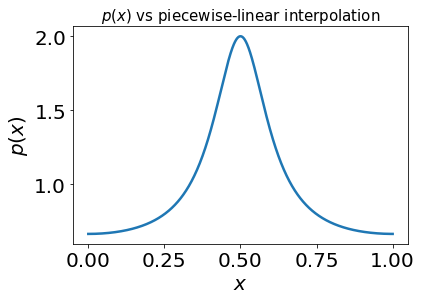

In [25]:
n = 0 # try from 0 to 10 

show = show_plots(title='$p(x)$ vs piecewise-linear interpolation',xy=['$x$','$p(x)$'])

show(x,p(x))
show(g(n),p(g(n)))

Let's make a table of the errors:

In [26]:
nmin, nmax = 1, 30

S = 1

print("'exact' integral value: S = ",S)
print('')

print(' n     T       S     |T-S|/|S| ')
print('--   -----   -----  -----------')
for n in range(nmin,nmax):
    T=trap(p,g(n))
    error(T,S,n=n)

'exact' integral value: S =  1

 n     T       S     |T-S|/|S| 
--   -----   -----  -----------
 1   0.667   1.000       3.3333e-01
 2   1.333   1.000       3.3333e-01
 3   0.889   1.000       1.1111e-01
 4   1.067   1.000       6.6667e-02
 5   0.970   1.000       3.0303e-02
 6   1.016   1.000       1.5873e-02
 7   0.992   1.000       7.7519e-03
 8   1.004   1.000       3.9216e-03
 9   0.998   1.000       1.9493e-03
10   1.001   1.000       9.7752e-04
11   1.000   1.000       4.8804e-04
12   1.000   1.000       2.4420e-04
13   1.000   1.000       1.2206e-04
14   1.000   1.000       6.1039e-05
15   1.000   1.000       3.0517e-05
16   1.000   1.000       1.5259e-05
17   1.000   1.000       7.6293e-06
18   1.000   1.000       3.8147e-06
19   1.000   1.000       1.9073e-06
20   1.000   1.000       9.5368e-07
21   1.000   1.000       4.7684e-07
22   1.000   1.000       2.3842e-07
23   1.000   1.000       1.1921e-07
24   1.000   1.000       5.9605e-08
25   1.000   1.000       2.9802e-08
26  

It looks like we are getting another *factor of two* of accuracy at each step!  

Let's look closer and see what's going on? 

In [27]:
nmin, nmax = 2, 256

e = np.zeros(nmax-nmin+1)
n = np.arange(nmin,nmax+1)

for i in range(len(n)):
    T=trap(p,g(n[i]))
    e[i] = error(T,S,report=False)   

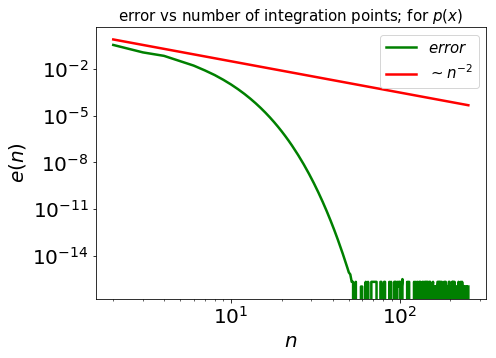

In [28]:
show = show_plots(style='log-log',figsize=(7,5),xy=['$n$','$e(n)$'],
                  title='error vs number of integration points; for $p(x)$');


show(n,e,color='green')
show(n,3/n**2,color='red')

show['$error$','$\sim n^{-2}$']

**WOA!** Something changed. It seems that we are getting an exponentially converging trapezoidal rule. 

To find out, let's plot the error on a `semi-log` scale.

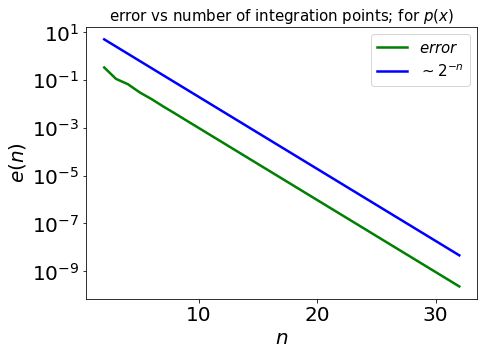

In [29]:
show = show_plots(style='log',figsize=(7,5),xy=['$n$','$e(n)$'],
                  title='error vs number of integration points; for $p(x)$');


i=31

show(n[0:i],e[0:i],color='green')
show(n[0:i],20/2**n[0:i],color='blue')

show['$error$','$\sim 2^{-n}$']

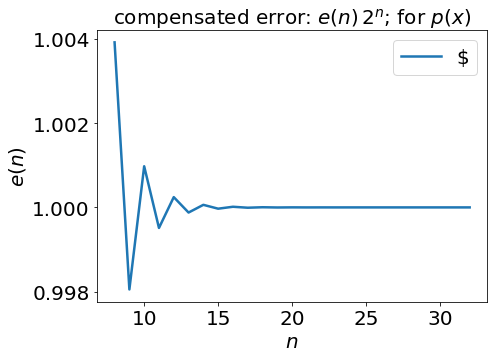

In [31]:
show = show_plots(figsize=(7,5),xy=['$n$','$e(n)$'],
                  title='compensated error: $e(n) \, 2^{n}$; for $p(x)$',titlesize=20);


i,j = 6,31

show(n[i:j],e[i:j]*2**n[i:j])

show['$error$']

### Exponential decrease of error with Trapezoidal and Periodic functions.

The error of the integral of $p(x)$ is going down exponentially fast

$$
\large e(n) \ \approx \ 2^{-n}.
$$



The full reasons for this will become clear later. For now we can ask what is the difference between the two examples. One of these functions is half of a ***periodic*** function. The `cosine` is a bit of a giveaway. Why do you think I called it $p(x)$? The $p$ stands for periodic.

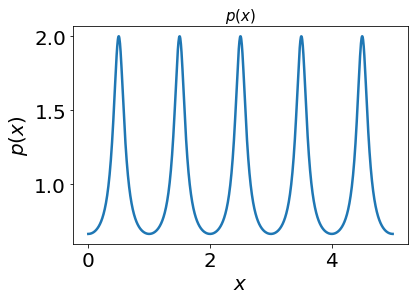

In [32]:
n = 0

show = show_plots(title='$p(x)$',xy=['$x$','$p(x)$'])

show(5*x,p(5*x))

We can see that the function is periodic if we extend it 5-fold.

We'll see more than a few magical properties of periodic functions as the course progresses.